# Solar Cell Models

## Single Diode

### Libraries, Constants & Initializations

In [172]:
from pylab import plot, show, xlabel, ylabel, title, grid
from scipy.constants import e, k
q = e # Elementary Charge
kB = k # Boltzmann Constant
I_min = -0.17#-0.1028 # Initial current value for voltage evaluation
I_max = 0#0.1028 # Final current value for voltage evaluation
Steps = 1000 # Total number of evaluation points for plotting
Theta = 0 # Transformation angle (if required)

### Initial Conditions

#### Blue solar cell

In [62]:
Iph = 0.1023 # Photogenerated Current (Amps)
I0 = 0.1036E-6 # Diode Reverse Saturation Current (Amps)
Rs = 0.06826 # Series Resistance (Ohms)
Rp = 1000. # Shunt Resistance (Ohms)
T = 300. # Temperature (K)
n = 1.5019 # Ideality Factor

#### Grey solar cell

In [ ]:
Iph = 0.5610 # Photogenerated Current (Amps)
I0 = 5.514E-6 # Diode Reverse Saturation Current (Amps)
Rs = 0.07769 # Series Resistance (Ohms)
Rp = 25.9 # Shunt Resistance (Ohms)
T = 307 # Temperature (K)
n = 1.7225 # Ideality Factor

### Symbolic Calculations

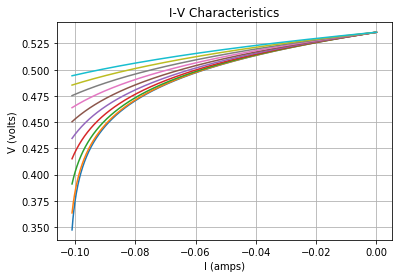

In [178]:
I = var('I') # Define I as a symbolic variable

# V(I) as given in "On Calculating the Current-Voltage Characteristic of Multi-Diode Models for Organic Solar Cells"
# Equation (6) in page 8
V = + I*Rs \
    + ((n*kB*T)/q) * log(lambert_w((((q/(n*kB*T)) * I0 * Rp).log() \
    + (q/(n*kB*T)) * Rp * (I+Iph+I0)).exp())) \
    - ((n*kB*T)/q) * log( (q/(n*kB*T)) * I0 * Rp )
I_min = -0.101
# Initialize axis lists for plotting
Theta_steps = 10
Theta = 0.0
# Evaluate V(I)
for i in range(Theta_steps) :
    x_axis = []
    y_axis = []
    for j in range(Steps+1) :
        I = I_min*cos(Theta)  +j*(I_max-I_min)*cos(Theta)/Steps
        y_axis.append(I*sec(Theta))
        x_axis.append(V(I).n())
    plot(y_axis,x_axis)
    Theta += 0.1
# Show Plots
title('I-V Characteristics')
xlabel('I (amps)')
ylabel('V (volts)')
grid(True)
show()